# THE SPARKS FOUNDATION INTERNSHIP

## Task 2 :Exploratory Data Analysis Global Terrorism

In [26]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
df = pd.read_csv(r"C:\Users\Rahul\Desktop\globalterrorismdb_0718dist.csv",encoding="ISO-8859-1")
print(df)


C:\Users\Rahul\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


             eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region  ... addnotes  \
0            5

In [ ]:
df.head()

In [29]:
df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df['Casualities'] = df.Killed + df.Wounded
df=df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]

df.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [ ]:
df.isnull().sum()


### Most Attack-prone countries of the world:¶

In [30]:
print(f"The highest terrorist attacks were commited in {df.Country.value_counts().index[0]} with {df.Country.value_counts().max()} attacks")

print('Top 4 countries with highest terrorist attacks following iraq are:')
for i in range(1,5):
    print(f"{i+1}. {df.Country.value_counts().index[i]} with {df.Country.value_counts()[i]} attacks")

The highest terrorist attacks were commited in Iraq with 24636 attacks
Top 4 countries with highest terrorist attacks following iraq are:
2. Pakistan with 14368 attacks
3. Afghanistan with 12731 attacks
4. India with 11960 attacks
5. Colombia with 8306 attacks


### Timeline of  attacks over past 45 years:¶

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'Year'

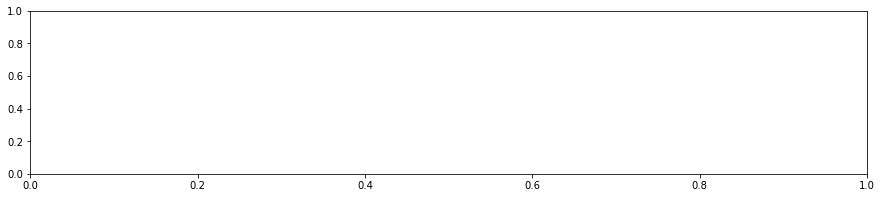

In [27]:

plt.subplots(figsize=(15,3))
sns.countplot('Year',data=df,palette='Accent')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks According to Each Year(1970-2017)')
plt.show()

### Timeline of Death:

In [ ]:
plt.subplots(figsize=(15,5))
year_cas = df.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
sns.barplot(x=year_cas.Year, y=year_cas.Casualities, palette='RdYlBu')
plt.xticks(rotation=80)
plt.title('Number Of Deaths Each Year')
plt.show()


### Nation-wise total attacks:

In [ ]:
plt.subplots(figsize=(15,3))
country_attacks = df.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'Spectral',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=50)
plt.title('Number Of Total Attacks in Each Nation')
plt.show()


### Terrain wise attack:¶

In [ ]:
region_attacks = df.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,8))
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette='Accent', edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=46)
plt.title('Number Of Total Attacks in Each Terrrain')
plt.show()


In [ ]:
group_attacks = df.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Organizations', 'Total Attacks']
group_attacks


In [ ]:
group_attacks = df.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
plt.subplots(figsize=(10,6))
sns.barplot(y=group_attacks['Terrorist Group'], x=group_attacks['Total Attacks'], palette='BuGn',
            )

plt.title('Number Of Total Attacks by Terrorist Group')
plt.show()


### Terrorist Organizations Attack Trend

In [ ]:
groups_10 = df[df.Group.isin(df.Group.value_counts()[1:11].index)]
pd.crosstab(groups_10.Year, groups_10.Group).plot(color=sns.color_palette('RdBu', 10))
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.xticks(range(1970, 2017, 5))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Organization Activities from 1970 to 2017')
plt.legend(labels=['Al-Shabaab',
                   'Boko Haraam',
                   'FMLN',
                   'IRA',
                   'ISIL',
                   'PKK',
                   'NPA',
                   'FARC',
                   'SL',
                   'Taliban'], loc='upper left')
plt.show()
